In [1]:
#Importing libraries

library(xlsx) #To import data
library(ggrepel) #To repel operlapping text labels in the map 
library(gridExtra) #To attach temperature and timeline as a grid map in last
library(tidyverse) #To get ggplot2 functions

#For font match 
#library(extrafont)
#font_import(paths = 'C:/Windows/Fonts', recursive = TRUE, prompt = TRUE,pattern = NULL)
windowsFonts(Times=windowsFont("Gabriola Regular"))


#Setting plot size in Jupyter Notebook
options(repr.plot.width=10, repr.plot.height=4)


Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.1.1       v purrr   0.3.2  
v tidyr   0.8.3       v dplyr   0.8.0.1
v readr   1.3.1       v stringr 1.4.0  
v tibble  2.1.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::combine() masks gridExtra::combine()
x dplyr::filter()  masks stats::filter()
x dplyr::lag()     masks stats::lag()


In [2]:
#Reading data from the dataset provided
dataFull <- read.xlsx("data/minard-data.xlsx", sheetName = "Sheet1", na.rm = TRUE)

In [3]:
cities <- dataFull %>% select(1:3)
cities <- na.omit(cities)
cities

LONC,LATC,CITY
24.0,55.0,Kowno
25.3,54.7,Wilna
26.4,54.4,Smorgoni
26.8,54.3,Molodexno
27.7,55.2,Gloubokoe
27.6,53.9,Minsk
28.5,54.3,Studienska
28.7,55.5,Polotzk
29.2,54.4,Bobr
30.2,55.3,Witebsk


In [4]:

army <- dataFull %>% select(9:13)
army <- na.omit(army)
army

LONP,LATP,SURV,DIR,DIV
24.0,54.9,340000,A,1
24.5,55.0,340000,A,1
25.5,54.5,340000,A,1
26.0,54.7,320000,A,1
27.0,54.8,300000,A,1
28.0,54.9,280000,A,1
28.5,55.0,240000,A,1
29.0,55.1,210000,A,1
30.0,55.2,180000,A,1
30.3,55.3,175000,A,1


In [5]:
temperature <- dataFull %>% select(4:8) 
temperature <- na.omit(temperature)
temperature

,LONT,TEMP,DAYS,MON,DAY
1,37.6,0,6,Oct,18
2,36.0,0,6,Oct,24
3,33.2,-9,16,Nov,9
4,32.0,-21,5,Nov,14
6,28.5,-20,4,Nov,28
7,27.2,-24,3,Dec,1
8,26.7,-30,5,Dec,6
9,25.3,-26,1,Dec,7


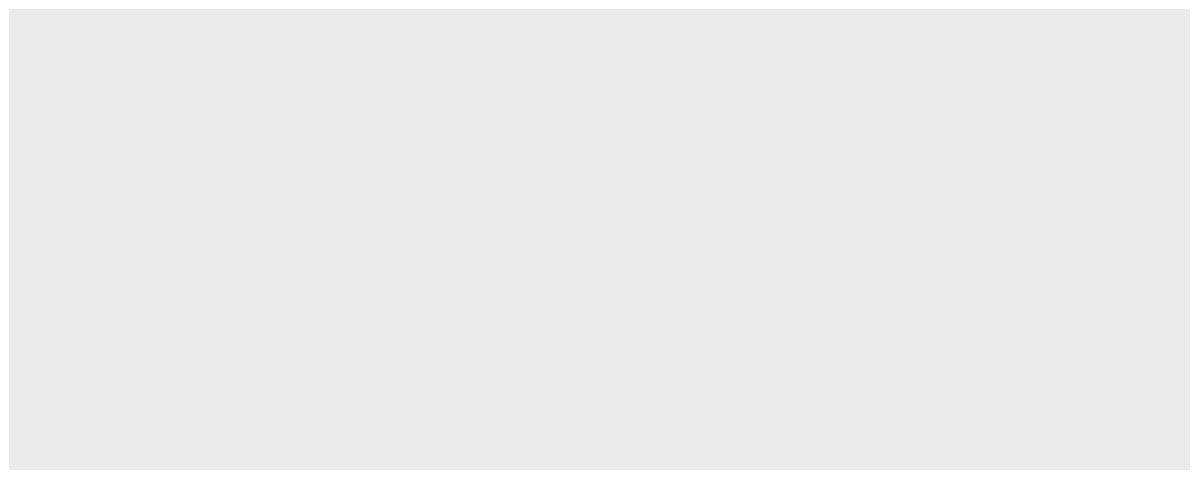

In [6]:
plot <- ggplot()
plot

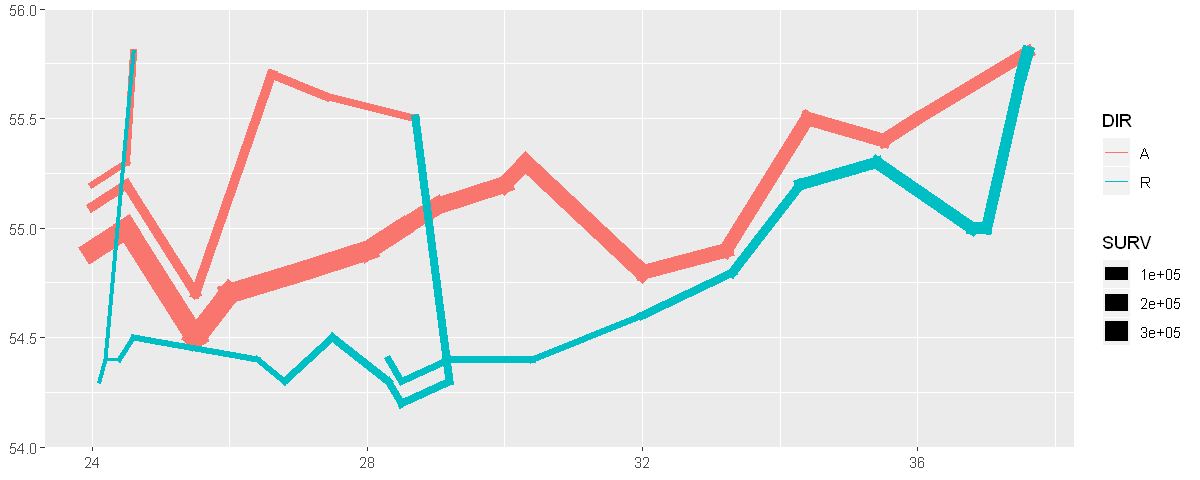

In [7]:
breaks <- c(1, 2, 3) * 10^5 
armyPath <- plot + geom_path(data = army, aes(x = LONP, y = LATP, group = DIV, 
                               color = DIR, size = SURV),
            lineend = "square") + labs(x = NULL, y = NULL) + scale_y_continuous( expand = c(0, 0.2))  #Line end style (round, butt, square)
armyPath

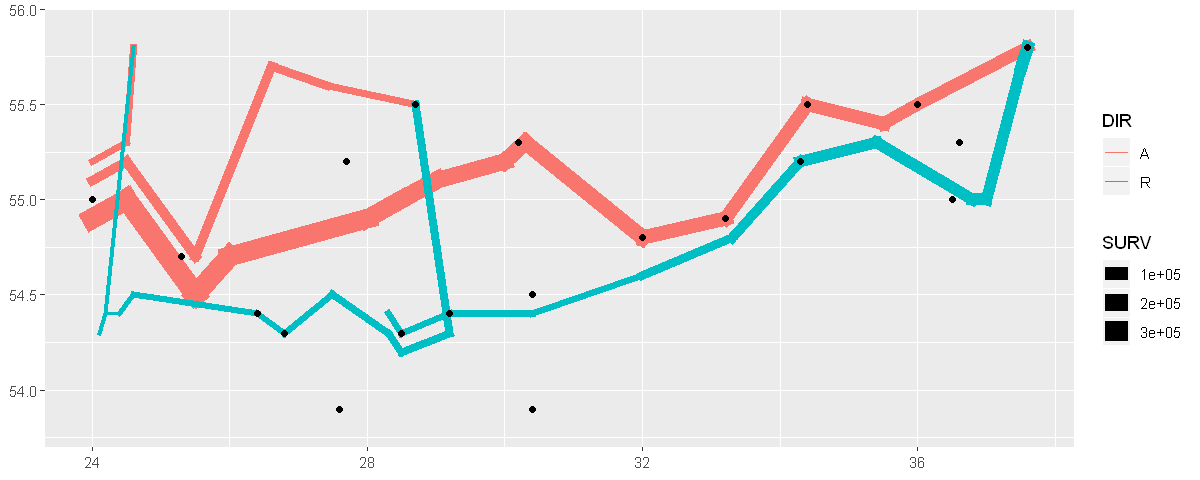

In [8]:
armyPlusCities <- armyPath +
  geom_point(data = cities, aes(x = LONC, y = LATC))
armyPlusCities

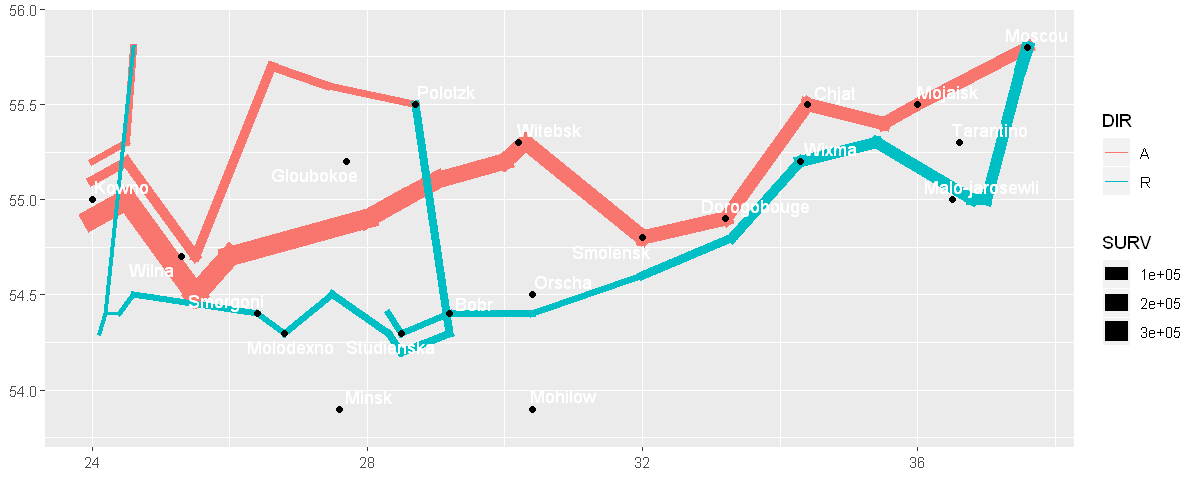

In [9]:
armyPlusCitiesWithLabel <- armyPlusCities + geom_text_repel(data = cities,
                            aes(x = LONC, y = LATC, label = CITY), color = "#ffffff")

armyPlusCitiesWithLabel

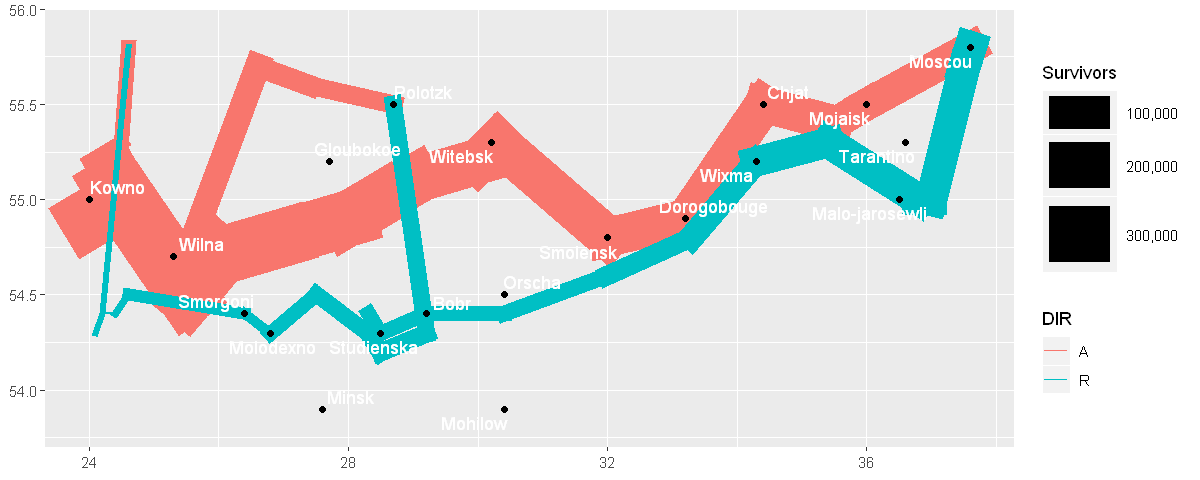

In [10]:
variationSized = armyPlusCitiesWithLabel +   scale_size("Survivors", range = c(0.7, 17), 
 	            breaks = breaks, labels = scales::comma(breaks)) 
variationSized

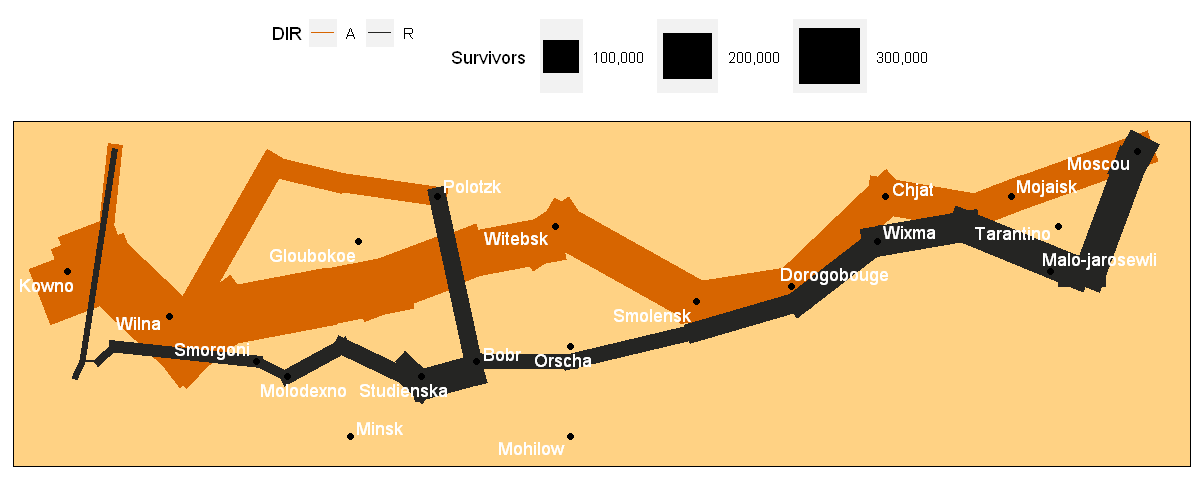

In [11]:
colouredPlot <- variationSized + 
  scale_colour_manual(values = c("#D76500", "#252523")) + theme(panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),panel.background = element_rect(fill = '#FFD284', colour = 'black') , 
                                                                legend.position = "top" ,
    axis.text.x = element_blank(), axis.text.y = element_blank(), axis.ticks = element_blank())
colouredPlot

In [12]:
formatedTemperature <- temperature %>% mutate(toDisplay = paste0(TEMP, "°C. ", DAY, " ", MON, "."))
formatedTemperature

LONT,TEMP,DAYS,MON,DAY,toDisplay
37.6,0,6,Oct,18,0°C. 18 Oct.
36.0,0,6,Oct,24,0°C. 24 Oct.
33.2,-9,16,Nov,9,-9°C. 9 Nov.
32.0,-21,5,Nov,14,-21°C. 14 Nov.
28.5,-20,4,Nov,28,-20°C. 28 Nov.
27.2,-24,3,Dec,1,-24°C. 1 Dec.
26.7,-30,5,Dec,6,-30°C. 6 Dec.
25.3,-26,1,Dec,7,-26°C. 7 Dec.


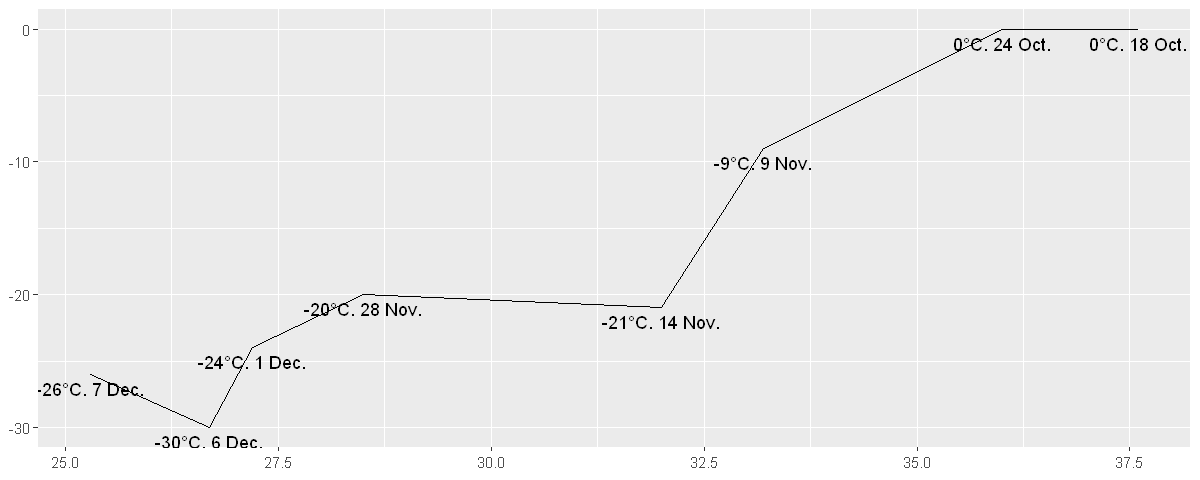

In [13]:
temperaturePlot <- ggplot(data = formatedTemperature, aes(x = LONT, y = TEMP)) +
  geom_line() + geom_text(aes(label = toDisplay), vjust = 1.5) + labs(x = NULL, y = NULL)

temperaturePlot

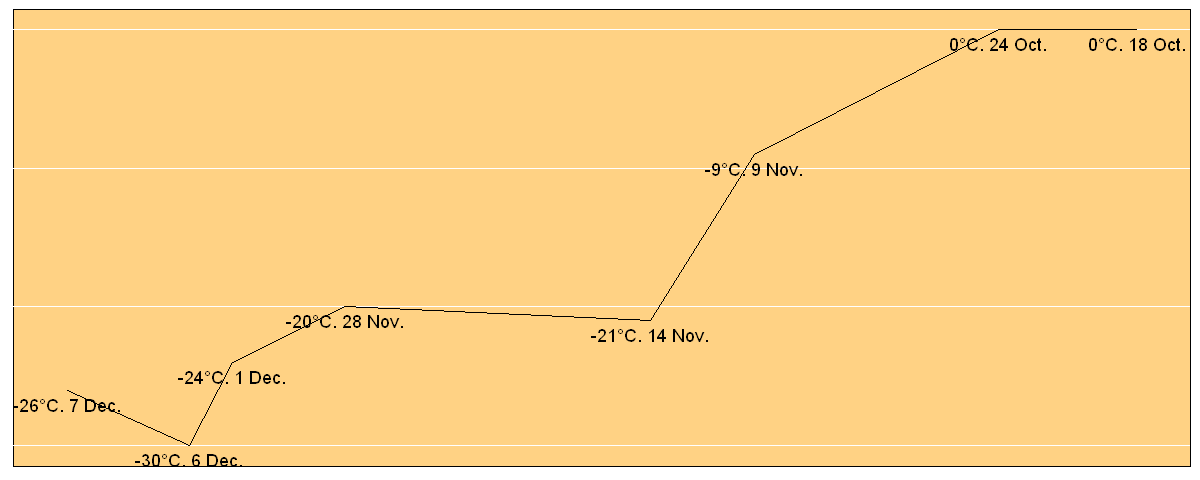

In [14]:
clearTempPlot <- temperaturePlot + theme(panel.grid.major.x = element_blank(),
        panel.grid.minor.x = element_blank(),
        panel.grid.minor.y = element_blank(),
        panel.background = element_rect(fill = '#FFD284', colour = 'black') , 
        axis.text.x = element_blank(),
        axis.text.y = element_blank(),
        axis.ticks = element_blank(),
        panel.border = element_blank())
clearTempPlot

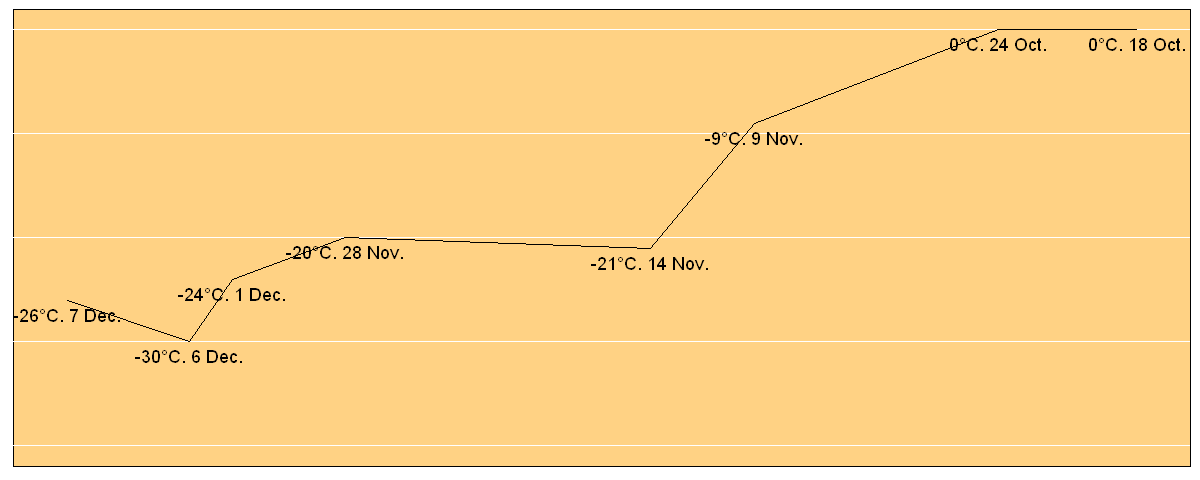

In [15]:
labelledTempPlot <- clearTempPlot +   scale_x_continuous(limits = ggplot_build(colouredPlot)$layout$panel_ranges[[1]]$x.range) +
  coord_cartesian(ylim = c(-40, 0)) 

labelledTempPlot

In [16]:
combinedPlot <- arrangeGrob(colouredPlot, labelledTempPlot, heights=c(10,4))
print(combinedPlot)


TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (2-2,1-1) arrange gtable[layout]


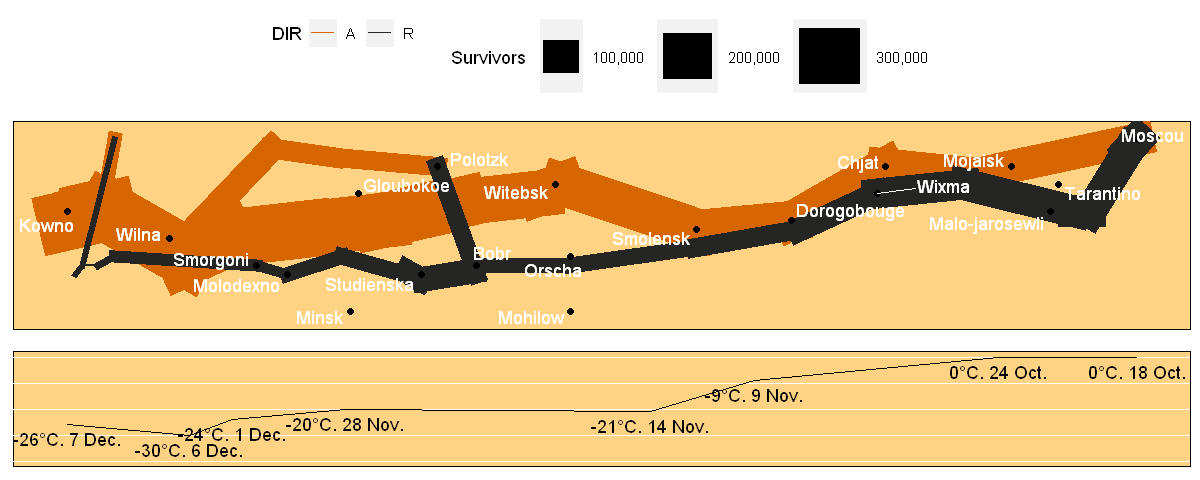

In [17]:
grid::grid.newpage()
grid::grid.draw(combinedPlot)

In [20]:
ggsave(file="minardsMap.png", combinedPlot, width=10, height=5, limitsize = FALSE)